<a href="https://colab.research.google.com/github/Alam710/Object-Oriented-programming/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

2301978476 - Hafizh Ash Shiddiqi

2301978450 - Afdhal Kurniawan

2301978444 - Islam Nur Alam

In [25]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Startups_Data.csv')
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Split Data to Categorical and Numerical

In [3]:
# separate the data based on data type
categorical_features = dataset.select_dtypes(include=['object']).columns
numerical_features = dataset.select_dtypes(exclude=['object']).columns

In [4]:
# create a dataframe with categorical features
df_categorical = dataset[categorical_features]
df_categorical.head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


In [5]:
# create a dataframe with numerical features
df_numerical = dataset[numerical_features]
df_numerical.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#### Encoding
Label encoding and One-hot Encoding

In [6]:
# print and count unique values in categorical features
for col in categorical_features:
    print(col, dataset[col].unique(), "Length:", len(dataset[col].unique()))

State ['New York' 'California' 'Florida'] Length: 3


In [7]:
def label_encode(df):
    for col in df.columns:
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.codes
    return df

In [8]:
# encode categorical features

df_categorical = label_encode(df_categorical)
df_categorical.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State
0,2
1,0
2,1
3,2
4,1


### Normalize

In [9]:
# normalize numerical features

def normalize_numerical(df):
    for col in df.columns:
        df[col] = df[col] / df[col].max()
    return df

In [10]:
df_numerical = normalize_numerical(df_numerical)
df_numerical.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.749527,1.000000,1.000000
1,0.983359,0.828805,0.940893,0.997557
2,0.927985,0.553781,0.864664,0.993699
3,0.873136,0.649738,0.812235,0.951317
4,0.859438,0.500378,0.776136,0.864383


### Join DF

In [11]:
df = pd.concat([df_categorical, df_numerical], axis=1)
df.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
0,2,1.000000,0.749527,1.000000,1.000000
1,0,0.983359,0.828805,0.940893,0.997557
2,1,0.927985,0.553781,0.864664,0.993699
3,2,0.873136,0.649738,0.812235,0.951317
4,1,0.859438,0.500378,0.776136,0.864383


In [12]:
# split X and y

X = df.drop('Profit', axis=1)
y = df['Profit']


In [13]:
X.head()

,State,R&D Spend,Administration,Marketing Spend
0,2,1.000000,0.749527,1.000000
1,0,0.983359,0.828805,0.940893
2,1,0.927985,0.553781,0.864664
3,2,0.873136,0.649738,0.812235
4,1,0.859438,0.500378,0.776136


In [14]:
y.head()

0    1.000000
1    0.997557
2    0.993699
3    0.951317
4    0.864383
Name: Profit, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
X_train.head()

,State,R&D Spend,Administration,Marketing Spend
36,1,0.173353,0.695644,0.426311
35,2,0.278284,0.465642,0.435618
41,1,0.168691,0.463799,0.348614
18,1,0.554881,0.625122,0.625116
43,2,0.093776,0.697429,0.075319


In [17]:
import numpy as np
class Multiple_Linear_Regression():   
    def __init__ (self):
        self.theta=np.zeros(int(np.random.random()),float)[:,np.newaxis]; 
    
    def fit(self, X_train, y_train):
        X_b = np.c_[np.ones(len(X_train)), X_train] 
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
    
    def predict(self, X_test):
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)
        
        return y_predict

In [18]:
model = Multiple_Linear_Regression()

In [19]:
model.fit(X_train, y_train)

In [20]:
y_preds = model.predict(X_test)

### Evaluation Metrics

In [21]:
def mse(y_preds, y):
    mse = ((y - y_preds)**2).mean()
    return mse

def rmse(y_preds, y):
    rmse = (((y - y_preds)**2).mean())**(1/2)
    return rmse

def r2(y_preds, y):
    ssr = sum((y - y_preds) ** 2) 
    sst = sum((y - y.mean()) ** 2) 
    return 1 - ssr/sst

In [22]:
mse(y_preds, y_test), rmse(y_preds, y_test), r2(y_preds ,y_test)

(0.00655136188279194, 0.08094048358387748, 0.9036809396256626)

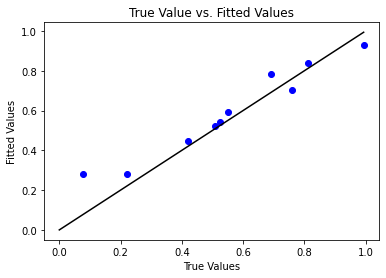

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(y_test, y_preds, color = 'blue')
ax.set_xlabel('True Values')
ax.set_ylabel('Fitted Values')
ax.add_line(plt.Line2D([0, y_test.max()], [0, y_test.max()], color='black'))
ax.set_title('True Value vs. Fitted Values');

### Comparing the Test Set with Predicted Values

In [24]:
# create dataframe with prediction
df_test_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df_test_preds

,Actual,Predicted
39,0.421330,0.447858
47,0.221363,0.279524
2,0.993699,0.930172
49,0.076361,0.282162
26,0.549946,0.591263
14,0.689698,0.784831
29,0.525349,0.542809
6,0.812031,0.838783
31,0.507035,0.522876
10,0.760015,0.705160
